In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import io
%cd "D:\PYTHON DATA SETS"

D:\PYTHON DATA SETS


In [5]:
# Importing the data

srbike=pd.read_excel("srbike.xlsx")

In [6]:
srbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [7]:
numcols=srbike.select_dtypes(include=np.number)

In [8]:
numcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [9]:
numcols=numcols.drop('Hour',axis=1)

In [10]:
numcols.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


In [11]:
# Extracting weekday and Month from DateTime

srbike['weekday']=srbike.Date.dt.weekday

In [12]:
srbike['month']=srbike.Date.dt.month

<Axes: ylabel='Frequency'>

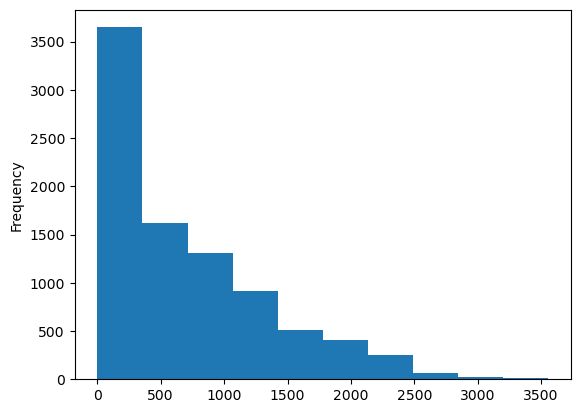

In [13]:
#  Histogram, Boxplot and Density Curve on Dependent variable(Rented Bike)

srbike['Rented Bike Count'].plot(kind='hist')

<Axes: >

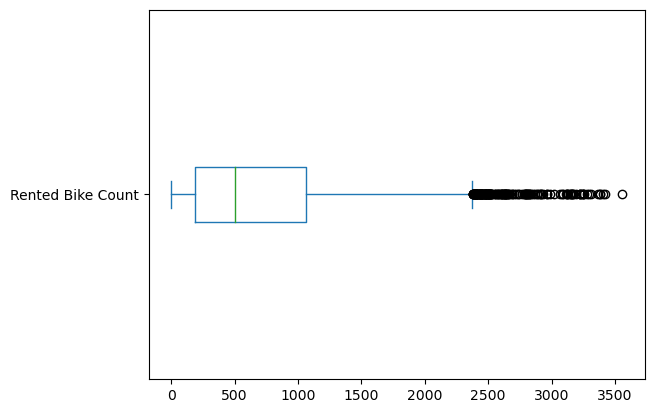

In [14]:
srbike['Rented Bike Count'].plot(kind='box',vert=False)

<Axes: ylabel='Density'>

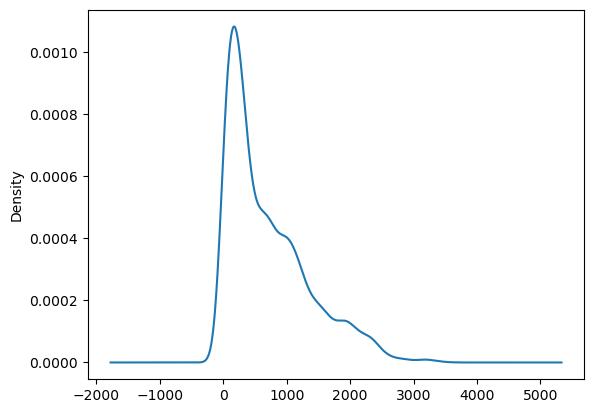

In [15]:
srbike['Rented Bike Count'].plot(kind='density')

<Axes: >

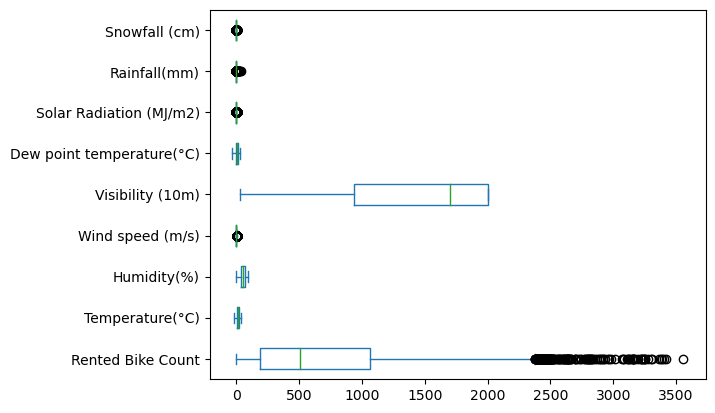

In [16]:
# Boxplot of all Numeric Variables

numcols.plot(kind='box',vert=False)

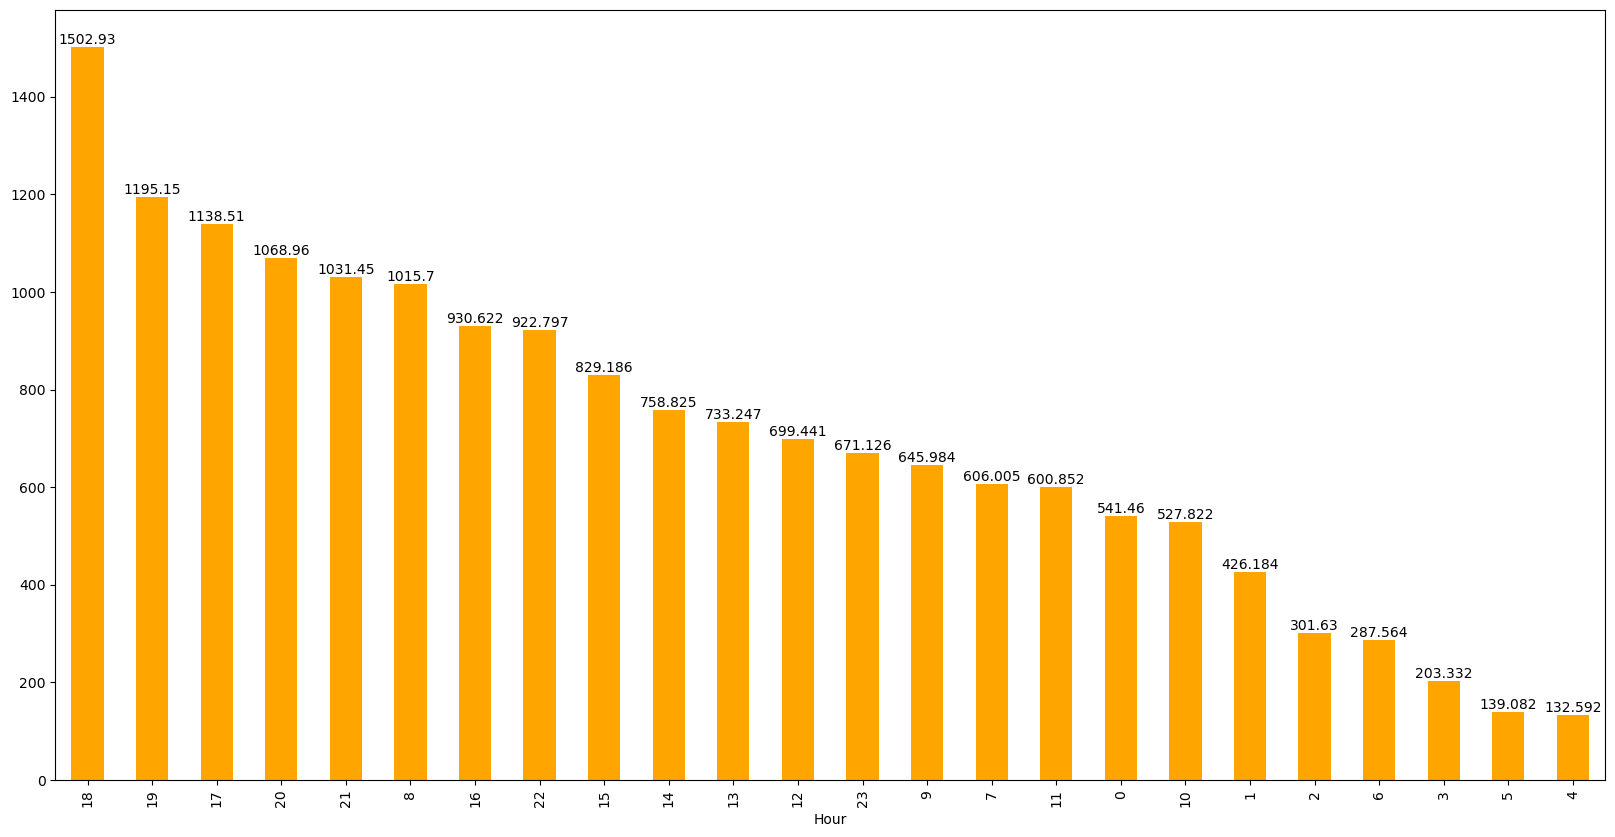

In [17]:
# Reneted Bike Count and Hour

plt.figure(figsize=(20,10))
ax=srbike['Rented Bike Count'].groupby(
srbike.Hour).mean().sort_values(
ascending=False).plot(kind='bar',color='orange')
for i in ax.containers:
    ax.bar_label(i)

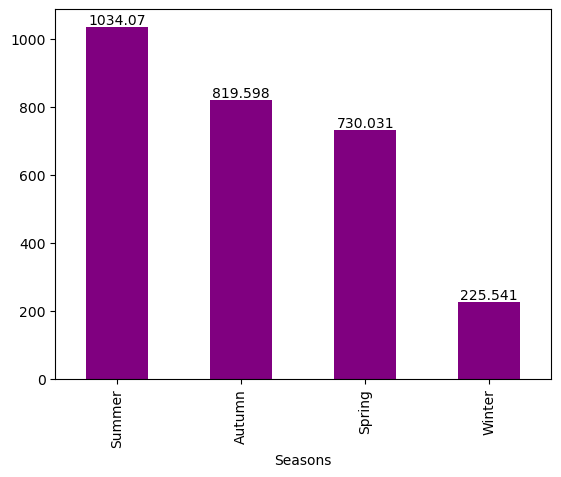

In [18]:
#Rented Bike Count and Seasons

ax=srbike['Rented Bike Count'].groupby(
srbike.Seasons).mean().sort_values(
ascending=False).plot(kind='bar',color='purple')
for i in ax.containers:
    ax.bar_label(i)

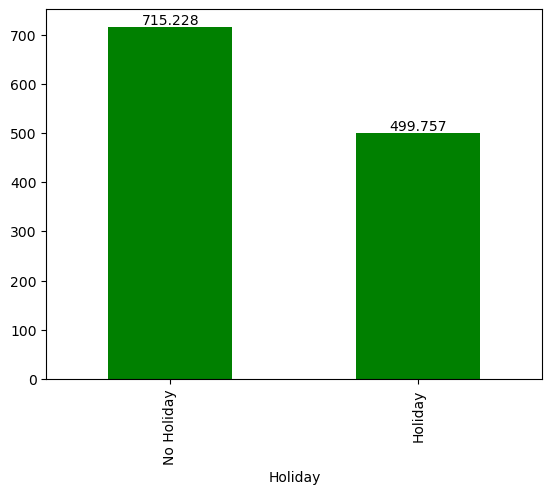

In [19]:
#  Rented Bike Count and Holiday

ax=srbike['Rented Bike Count'].groupby(
srbike.Holiday).mean().sort_values(
ascending=False).plot(kind='bar',color='green')
for i in ax.containers:
    ax.bar_label(i)

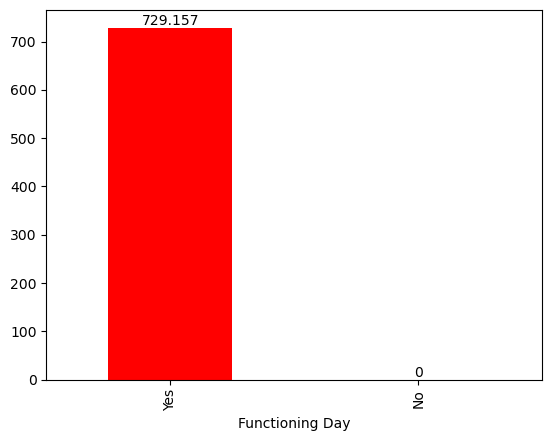

In [20]:
#  Rented Bike Count and Functional Day

ax=srbike['Rented Bike Count'].groupby(
srbike['Functioning Day']).mean().sort_values(
ascending=False).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i)

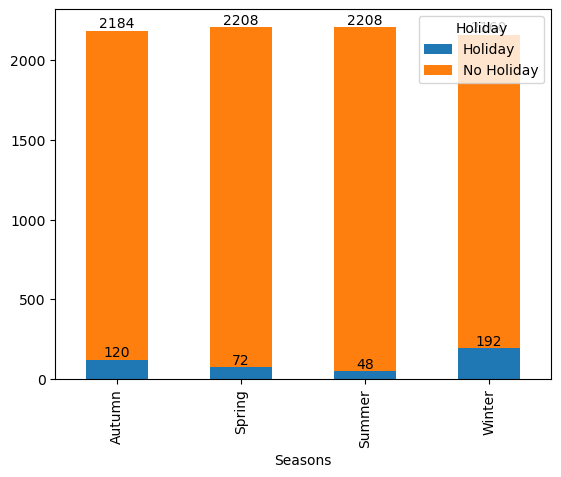

In [21]:
ax=pd.crosstab(srbike.Seasons,srbike.Holiday).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

In [22]:
import seaborn as sns

<Axes: >

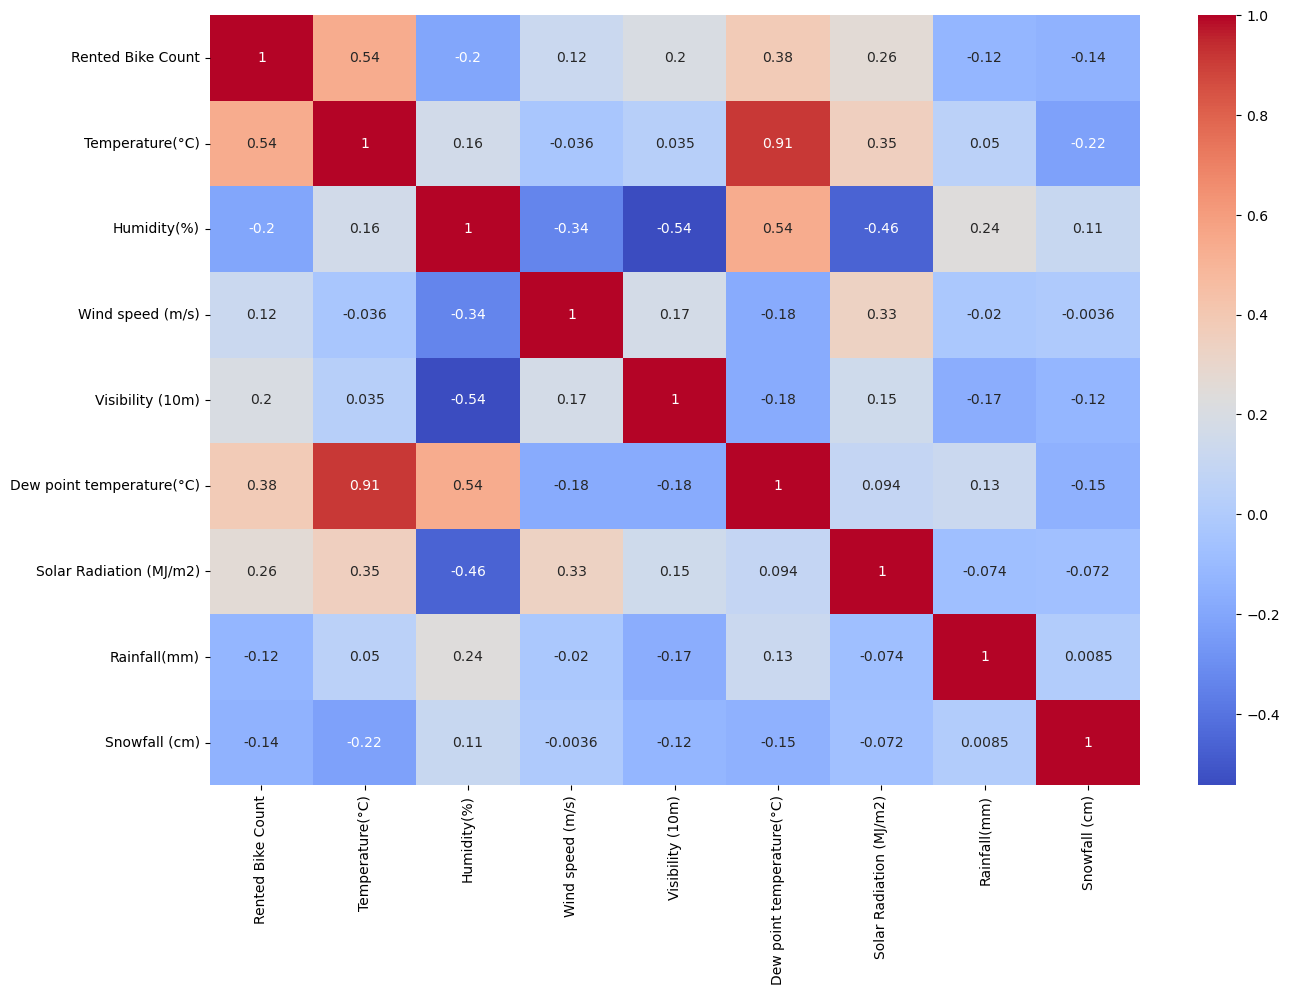

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(numcols.corr(),annot=True,cmap='coolwarm')

In [24]:
#  Test Null Average Rented Bike Count on holiday/no holiday equal

srbike['Rented Bike Count'].groupby(srbike.Holiday).mean()

Holiday
Holiday      499.76
No Holiday   715.23
Name: Rented Bike Count, dtype: float64

In [25]:
yes=srbike[srbike.Holiday=='Holiday']
no=srbike[srbike.Holiday=='No Holiday']

In [26]:
from scipy.stats import ttest_ind

In [27]:
ttest_ind(yes['Rented Bike Count'],no['Rented Bike Count'],equal_var=False)

Ttest_indResult(statistic=-7.5973291340447595, pvalue=1.545340334026087e-13)

In [28]:
# P value=1.54e^-13 , less than 0.05 so Reject Null

In [29]:
# Test Null Average Visibility on holiday/no holiday equal

srbike['Visibility (10m)'].groupby(srbike.Holiday).mean()

Holiday
Holiday      1521.68
No Holiday   1432.42
Name: Visibility (10m), dtype: float64

In [30]:
ttest_ind(yes['Visibility (10m)'],no['Visibility (10m)'],equal_var=False)

Ttest_indResult(statistic=2.84700685823211, pvalue=0.004605416276474864)

In [31]:
# P value=0.004, less than 0.05 so Reject Null

In [32]:
#  Test Null Average Rented Bike Count of different seasons equal

srbike['Rented Bike Count'].groupby(srbike.Seasons).mean()

Seasons
Autumn    819.60
Spring    730.03
Summer   1034.07
Winter    225.54
Name: Rented Bike Count, dtype: float64

In [33]:
s1=srbike[srbike.Seasons=='Autumn']
s2=srbike[srbike.Seasons=='Spring']
s3=srbike[srbike.Seasons=='Summer']
s4=srbike[srbike.Seasons=='Winter']

In [34]:
from scipy.stats import f_oneway

In [35]:
f_oneway(s1['Rented Bike Count'],s2['Rented Bike Count'],s3['Rented Bike Count'],s4['Rented Bike Count'])

F_onewayResult(statistic=776.4678149879506, pvalue=0.0)

In [36]:
# P value=0, less than 0.05 so reject null

In [37]:
#  Test Null Visibility of different seasons equal

srbike['Visibility (10m)'].groupby(srbike.Seasons).mean()

Seasons
Autumn   1560.75
Spring   1240.36
Summer   1501.75
Winter   1445.99
Name: Visibility (10m), dtype: float64

In [38]:
f_oneway(s1['Rented Bike Count'],s2['Rented Bike Count'],s3['Rented Bike Count'],s4['Rented Bike Count'])

F_onewayResult(statistic=776.4678149879506, pvalue=0.0)

In [39]:
# P value=0, less tha 0.05 so reject null

In [40]:
from scipy.stats import chi2_contingency

In [41]:
#  Test Null No Association between seasons and holiday

chi2_contingency(pd.crosstab(srbike.Seasons,srbike.Holiday))

Chi2ContingencyResult(statistic=122.58722091136573, pvalue=2.1388791104963462e-26, dof=3, expected_freq=array([[ 107.70410959, 2076.29589041],
       [ 108.88767123, 2099.11232877],
       [ 108.88767123, 2099.11232877],
       [ 106.52054795, 2053.47945205]]))

In [42]:
# P value is  less than 0.05 so reject null

In [43]:
#  Test Null No Association between holiday and functional

chi2_contingency(pd.crosstab(srbike.Holiday,srbike['Functioning Day']))

Chi2ContingencyResult(statistic=5.996313634599221, pvalue=0.014335802213322982, dof=1, expected_freq=array([[  14.54794521,  417.45205479],
       [ 280.45205479, 8047.54794521]]))

In [44]:
# pvalue=0.014335802213322982 less than 0.05 so reject null

In [45]:
# Separating the object variables from dataframe srbike

# Adding weekday and month to objcols

objcols=srbike[['weekday','month','Seasons','Holiday','Functioning Day','Hour']]

In [46]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   weekday          8760 non-null   int64 
 1   month            8760 non-null   int64 
 2   Seasons          8760 non-null   object
 3   Holiday          8760 non-null   object
 4   Functioning Day  8760 non-null   object
 5   Hour             8760 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 410.8+ KB


In [47]:
numcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 616.1 KB


In [48]:
from sklearn.preprocessing import LabelEncoder


In [49]:
le=LabelEncoder()


In [50]:
objcols_encode=objcols.apply(le.fit_transform)

In [51]:
objcols_encode.head(20)

,weekday,month,Seasons,Holiday,Functioning Day,Hour
0,4,11,3,1,1,0
1,4,11,3,1,1,1
2,4,11,3,1,1,2
3,4,11,3,1,1,3
4,4,11,3,1,1,4
5,4,11,3,1,1,5
6,4,11,3,1,1,6
7,4,11,3,1,1,7
8,4,11,3,1,1,8
9,4,11,3,1,1,9


In [52]:
# Get Dummies for objcols

objcols_dummy=pd.get_dummies(objcols,columns=['weekday','month','Seasons','Holiday','Functioning Day'])

In [53]:
numcols=numcols.drop('Rented Bike Count',axis=1)

<Axes: >

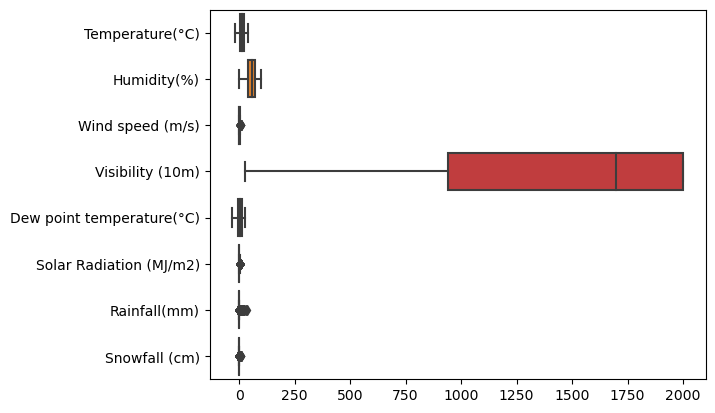

In [54]:
sns.boxplot(numcols,orient='h')

In [55]:
# Scaling the numeric variables

from sklearn.preprocessing import StandardScaler

In [56]:
stdscaler=StandardScaler()

In [57]:
numcols_scaled=stdscaler.fit_transform(numcols)

In [58]:
# Conversion of Arrary structure  into dataframe

numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [59]:
# Combaining the dataframes of numcols_scaled and objcols_dummy

combinedf=pd.concat([numcols_scaled,objcols_encode],axis=1)

In [60]:
# Splitting the data into independent variable(y) and dependent variables(x)

y=srbike['Rented Bike Count']
X=combinedf

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Split Data into Train(75%) & Test(25%)

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=42)

In [63]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(°C)            8760 non-null   float64
 1   Humidity(%)                8760 non-null   float64
 2   Wind speed (m/s)           8760 non-null   float64
 3   Visibility (10m)           8760 non-null   float64
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Solar Radiation (MJ/m2)    8760 non-null   float64
 6   Rainfall(mm)               8760 non-null   float64
 7   Snowfall (cm)              8760 non-null   float64
 8   weekday                    8760 non-null   int64  
 9   month                      8760 non-null   int64  
 10  Seasons                    8760 non-null   int32  
 11  Holiday                    8760 non-null   int32  
 12  Functioning Day            8760 non-null   int32  
 13  Hour                       8760 non-null   int64

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
reg=LinearRegression()

In [72]:
regmodel=reg.fit(X_train,y_train)

In [73]:
regmodel.score(X_train,y_train)

0.5562239353287584

In [61]:
reg_train_pred=regmodel.predict(X_train)

In [62]:
reg_train_resid=y_train-reg_train_pred

In [63]:
np.sqrt(np.mean(reg_train_resid**2)) # RMSE

409.5285104971131

In [64]:
reg_test_pred=regmodel.predict(X_test)

In [65]:
reg_test_resid=y_test-reg_test_pred

In [66]:
np.sqrt(np.mean(reg_test_resid**2)) # RMSE

416.6382571278897

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
tree=DecisionTreeRegressor(max_depth=10)

In [69]:
treemodel=tree.fit(X_train,y_train)

In [70]:
treemodel.score(X_train,y_train)

0.8937972116190627

In [64]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(tree,X_train,y_train)

array([0.80548242, 0.82856783, 0.83001926, 0.82892954, 0.83779484])

In [73]:
np.mean([0.7995473 , 0.82901652, 0.81871628, 0.81998332, 0.83627063])

0.8207068100000001

In [74]:
tree_train_pred=treemodel.predict(X_train)

In [75]:
tree_train_resid=y_train-tree_train_pred

In [76]:
np.sqrt(np.mean(tree_train_resid**2))

210.75293159443063

In [77]:
tree_test_pred=treemodel.predict(X_test)

In [78]:
tree_test_resid=y_test-tree_test_pred

In [79]:
np.sqrt(np.mean(tree_test_resid**2))

267.6032252937981

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
RF=RandomForestRegressor(n_estimators=1000)

In [82]:
RFmodel=RF.fit(X_train,y_train)

In [83]:
RFmodel.score(X_train,y_train)

0.9900499703777133

In [84]:
cross_val_score(RF,X_train,y_train)

array([0.90785519, 0.924109  , 0.91948662, 0.91558244, 0.92153601])

In [85]:
np.mean([0.90861637, 0.92424458, 0.91949631, 0.91502406, 0.92183604])

0.917843472

In [86]:
RF_train_pred=RFmodel.predict(X_train)

In [87]:
RF_train_resid=y_train-RF_train_pred

In [88]:
np.sqrt(np.mean(RF_train_resid**2))

64.50863488433652

In [89]:
RF_test_pred=RFmodel.predict(X_test)

In [90]:
RF_test_resid=y_test-RF_test_pred

In [91]:
np.sqrt(np.mean(RF_test_resid**2))

184.44635024902084

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
gbm=GradientBoostingRegressor(n_estimators=1000)

In [81]:
gbmmodel=gbm.fit(X_train,y_train)

In [82]:
gbmmodel.score(X_train,y_train)

0.9643518688787591

In [78]:
cross_val_score(gbm,X_train,y_train)

array([0.92451331, 0.93165157, 0.92670631, 0.92755168, 0.92459452])

In [79]:
np.mean([0.923143  , 0.93299455, 0.92450624, 0.92802324, 0.91891037])

0.92551548

In [98]:
gbm_train_pred=gbmmodel.predict(X_train)

In [99]:
gbm_train_resid=y_train-gbm_train_pred

In [100]:
np.sqrt(np.mean(gbm_train_resid**2))

76.0464451072412

In [101]:
gbm_test_pred=gbmmodel.predict(X_test)

In [102]:
gbm_test_resid=y_test-gbm_test_pred

In [103]:
np.sqrt(np.mean(gbm_test_resid**2))

178.33085154032358

In [104]:
from sklearn.svm import SVR

In [105]:
svm=SVR(C=1e5,kernel='linear')

In [106]:
svmmodel=svm.fit(X_train,y_train)

In [107]:
svmmodel.score(X_train,y_train)

0.5690375843515829

In [108]:
svm_train_pred=svmmodel.predict(X_train)

In [109]:
svm_train_resid=y_train-svm_train_pred

In [110]:
np.sqrt(np.mean(svm_train_resid**2))

424.54659607633556

In [111]:
svm_test_pred=svmmodel.predict(X_test)

In [112]:
svm_test_resid=y_test-svm_test_pred

In [113]:
np.sqrt(np.mean(svm_test_resid**2))

430.4008505036743

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [115]:
knn=KNeighborsRegressor()

In [116]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [117]:
grid_search=grid.fit(X_train,y_train)

In [118]:
grid_search.best_params_

{'n_neighbors': 3}

In [119]:
grid_search.best_score_

0.8356263363434917

In [120]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=3)

In [121]:
grid_search.score(X_train,y_train)

0.9374800206436331